In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['date'].dtype

dtype('<M8[ns]')

In [6]:
df.set_index('date', inplace=True)

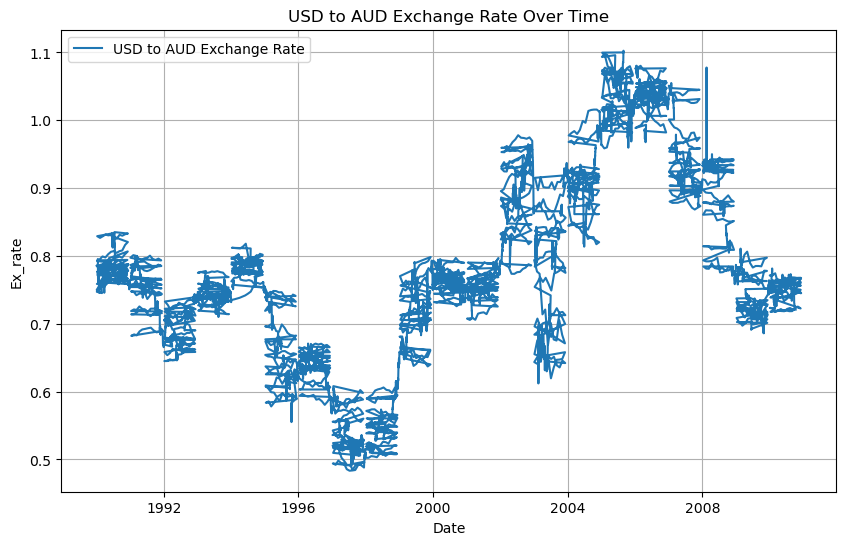

In [8]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Ex_rate')
plt.legend()
plt.grid()
plt.show()


Ex_rate    0
dtype: int64


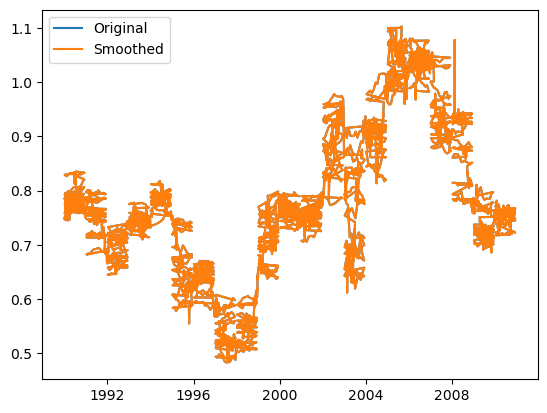

In [9]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with interpolation
df['USD_AUD'] = df['Ex_rate'].interpolate()

# Check for anomalies (e.g., sudden spikes/drops)
# Optionally, smooth the series for better visualization
df['smoothed'] = df['Ex_rate'].rolling(window=7).mean()

# Replot for comparison
plt.plot(df.index, df['Ex_rate'], label='Original')
plt.plot(df.index, df['Ex_rate'], label='Smoothed')
plt.legend()
plt.show()


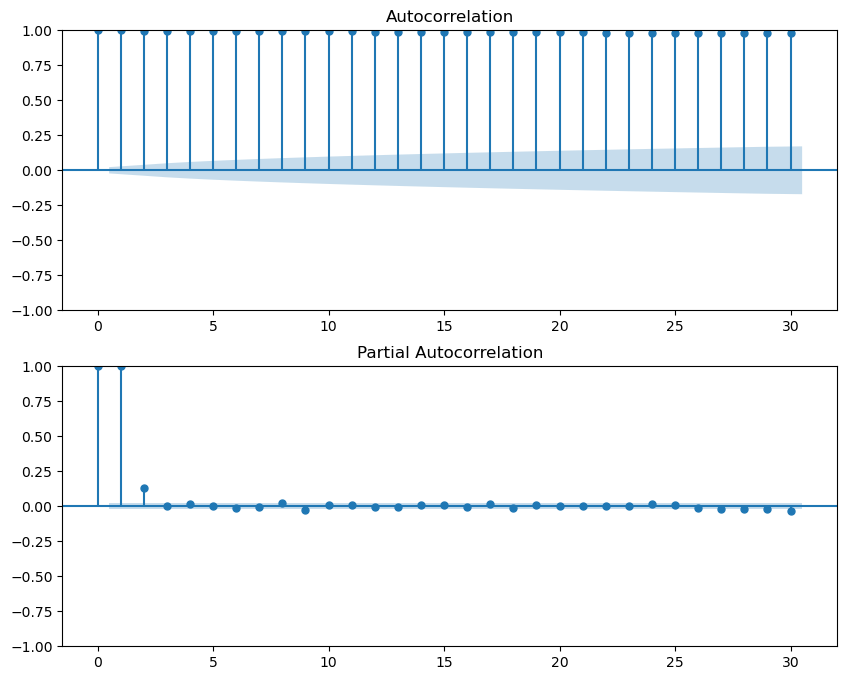

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['Ex_rate'], ax=ax[0], lags=30)
plot_pacf(df['Ex_rate'], ax=ax[1], lags=30)
plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Example ARIMA model (p=1, d=1, q=1)
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 16 Nov 2024   AIC                         -56102.322
Time:                        17:41:31   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


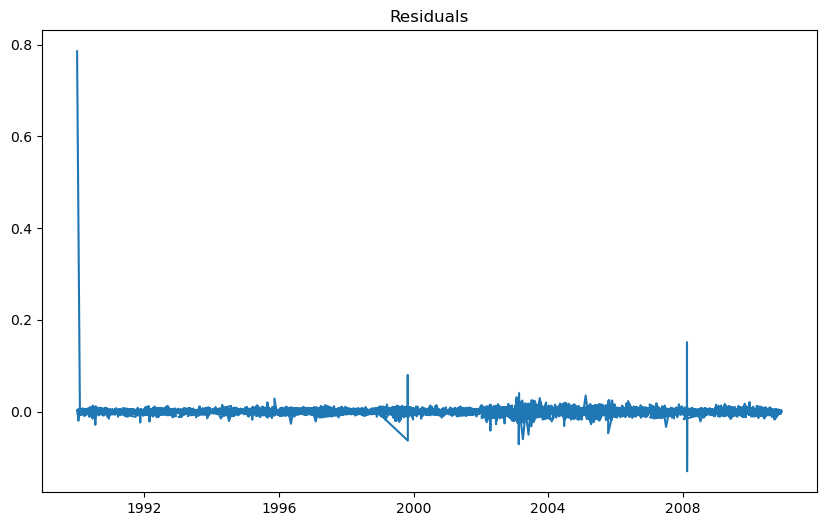

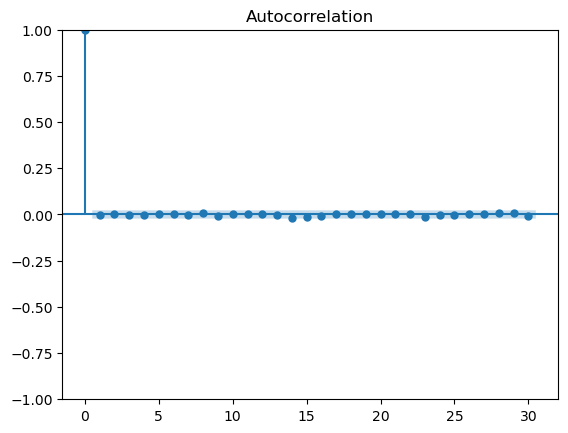

In [12]:
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# ACF of residuals
plot_acf(residuals, lags=30)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


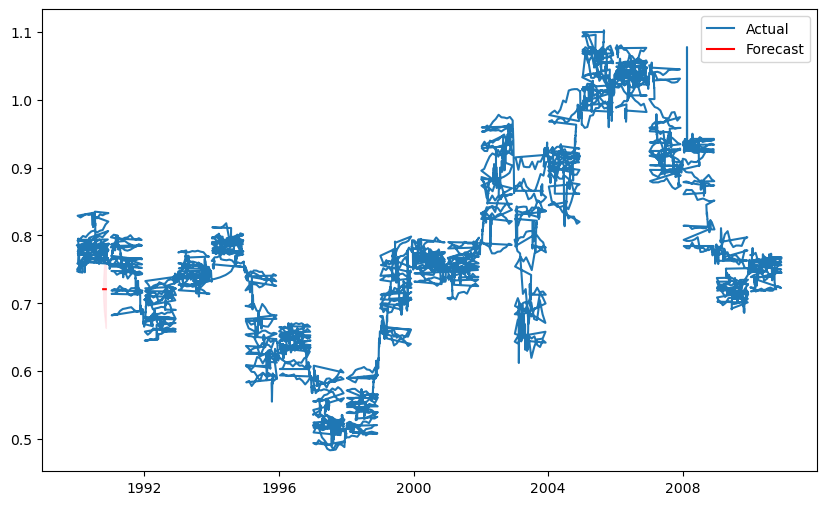

In [13]:
# Forecast future values
forecast = model_fit.get_forecast(steps=30)
forecast_index = forecast.row_labels
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example: Holt-Winters model
hw_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
hw_fit = hw_model.fit()

# Summary
print(hw_fit.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Sat, 16 Nov 2024
Box-Cox:                          False   Time:                         17:45:49
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700395                alpha                 True
smoothing_trend           3.9825e-

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


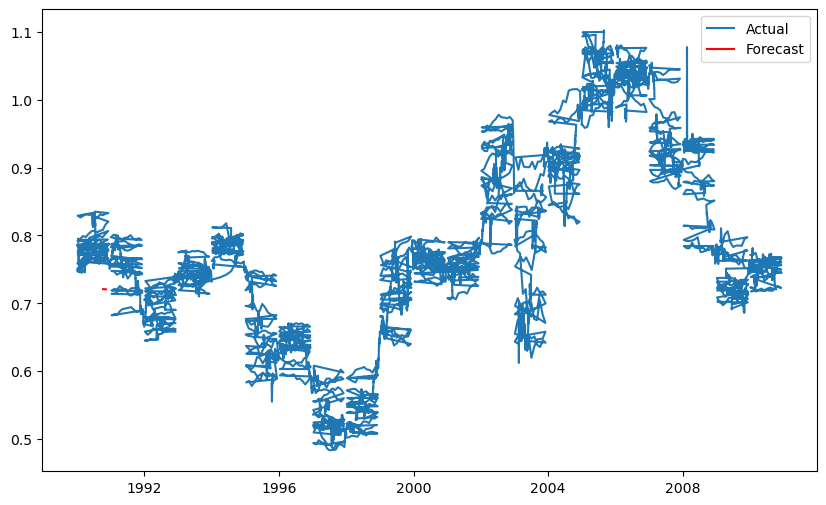

In [15]:
hw_forecast = hw_fit.forecast(steps=30)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(hw_forecast.index, hw_forecast, label='Forecast', color='red')
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Example for ARIMA
arima_mae = mean_absolute_error(df['Ex_rate'], model_fit.fittedvalues)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'], model_fit.fittedvalues))

print(f"ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}")


ARIMA - MAE: 0.0037958716561679023, RMSE: 0.010828926684709566
